# Question 5

Reproducing Figure 2a - The maximum daily SST anomaly at each location during 2002 to July 2016, relative to the 2002–2012 climatology

In [10]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import fsspec

import xarray as xr
xr.set_options(display_style="html")  # display dataset nicely

import warnings
warnings.simplefilter("ignore")  # filter some warning messages

# code features from https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
crs = ccrs.PlateCarree()  # set projection

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from pathlib import Path

# Small style adjustments for more readable plots
plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 14

### Import and filter data

In [12]:
ds = xr.open_dataset("~/shared/climate-data/ds_hw.nc")

#select daily SST 2002 - 2016
ds_2016 = ds.analysed_sst.sel(time=slice('2002-01-01', '2016-07-01'))

#select daily SST 2002 - 2012
ds_2012 = ds.analysed_sst.sel(time=slice('2002-01-01', '2012-12-31'))

### Calculate Anomaly

In [13]:
#determine the maximum SST 2002 - 2016, grouped by the day of year  
ds_2016_grouped = ds_2016.groupby("time.dayofyear").max()

#determine the mean SST 2002 - 2012, grouped by the day of year  
ds_2012_grouped = ds_2012.groupby("time.dayofyear").mean()

#calculate the maximum anomaly - subtracting maximum SST 2002-2016 by the mean SST 2002 - 2012
anomaly_in_C = ((ds_2016_grouped) - (ds_2012_grouped)).rename("SST (°C)")

In [14]:
#find the maximum SST anomaly at each location
max_anomaly_location = np.zeros(shape=(251,234))
max_anomaly_location = np.amax(anomaly_in_C.data, axis=0, out=max_anomaly_location)

#set SST anomaly greater than 5 to 5 (plotting purpose)
max_anomaly_location[max_anomaly_location>5] = 5

In [15]:
#create a DataArray with the max_anomaly_location
da = xr.DataArray(
    data=max_anomaly_location,
    dims=["lat", "lon"],
    coords=dict(
        lat=(["lat"], anomaly_in_C.lat.data),
        lon=(["lon"], anomaly_in_C.lon.data),
    ),
    attrs=dict(
        description="SST temperature.",
        units="SST (°C)",
    ),
)

### Plot Figure 2a (The maximum daily SST anomaly at each location during 2002 to July 2016)

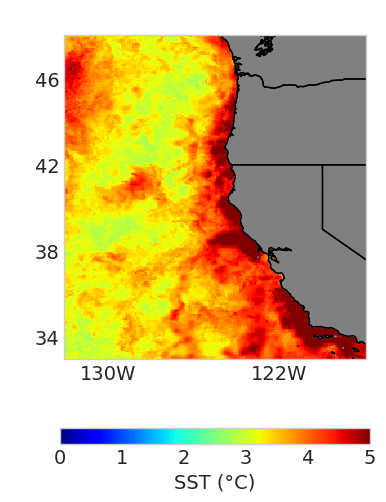

In [16]:
#Add color bar and projection
ax = plt.subplot(projection=crs)
da.plot(ax=ax, transform=crs, vmin=0, vmax=5, cmap='jet', cbar_kwargs={'ticks': [0, 1, 2, 3, 4, 5], 
                                           'location':'bottom',
                                          'shrink':0.5,
                                           'label':'SST (°C)',
                                          })


# Plot on a map
ax.coastlines("10m", color="k", zorder = 2)
ax.add_feature(cfeature.LAND, color="grey", zorder = 2)
ax.add_feature(cfeature.STATES.with_scale("10m"), zorder = 2)


# Add labels
plt.xlabel(" ")
plt.ylabel(" ")
plt.title(" ")
#plt.xlim(-138, -118)
#plt.ylim(33, 48)
plt.xticks([-130, -122], ['130W', '122W'])
plt.yticks([34, 38, 42, 46], ['34', '38', '42', '46'])

### Image Output ###
plt.savefig('./outputs/climate-Q5-Figure2a.png');